In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
data_df = pd.read_csv('Downloads/books.csv', error_bad_lines = False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


# Intro to DataSet

In [96]:
data_df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964
...,...,...,...,...,...,...,...,...,...,...
13709,47699,M Is for Magic,Neil Gaiman-Teddy Kristiansen,3.82,0061186422,9780061186424,eng,260,11317,1060
13710,47700,Black Orchid,Neil Gaiman-Dave McKean,3.72,0930289552,9780930289553,eng,160,8710,361
13711,47701,InterWorld (InterWorld #1),Neil Gaiman-Michael Reaves,3.53,0061238961,9780061238963,en-US,239,14334,1485
13712,47708,The Faeries' Oracle,Brian Froud-Jessica Macbeth,4.43,0743201116,9780743201117,eng,224,1550,38


In [97]:
data_df.authors.value_counts()

Agatha Christie                                                                                             69
Stephen King                                                                                                66
Orson Scott Card                                                                                            48
Rumiko Takahashi                                                                                            46
P.G. Wodehouse                                                                                              42
                                                                                                            ..
Jerry B. Jenkins-Tim LaHaye-Chris Fabry                                                                      1
Jean-Paul Gabilliet-François Gallix-Janice Fiamengo-Raphaelle Costa de Beauregard-Priscilla Morin-Ollier     1
Tom Clancy-Leon A. Edney                                                                                     1
L

In [98]:
data_df.average_rating.isnull().value_counts()

False    13714
Name: average_rating, dtype: int64

# Feature Interaction


In [99]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
bookID                13714 non-null int64
title                 13714 non-null object
authors               13714 non-null object
average_rating        13714 non-null float64
isbn                  13714 non-null object
isbn13                13714 non-null int64
language_code         13714 non-null object
# num_pages           13714 non-null int64
ratings_count         13714 non-null int64
text_reviews_count    13714 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


In [100]:
data_df.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13714.000000,13714.000000,1.371400e+04,13714.000000,1.371400e+04,13714.000000
mean,22159.859195,3.930620,9.764017e+12,342.402727,1.776540e+04,533.632128
std,13700.926816,0.357893,3.987679e+11,252.650165,1.129572e+05,2529.006691
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10619.250000,3.770000,9.780345e+12,196.000000,8.300000e+01,7.000000
50%,21321.500000,3.960000,9.780613e+12,301.000000,6.305000e+02,40.000000
75%,33311.750000,4.130000,9.780940e+12,421.000000,4.742250e+03,222.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


In [101]:
data_df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '# num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

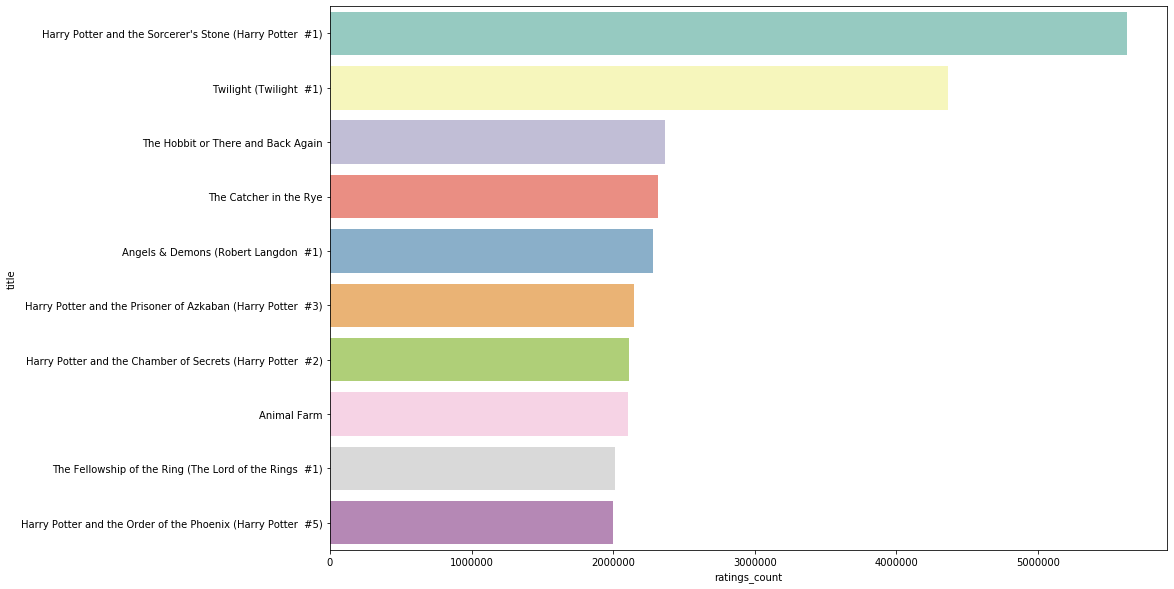

In [102]:
most_rated = data_df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='Set3')

In [103]:
data_df.shape

(13714, 10)

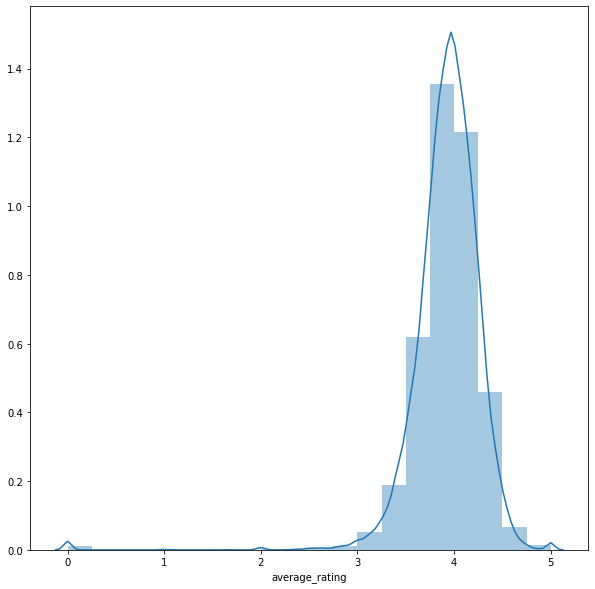

In [104]:
plt.figure(figsize=(10,10))
rating= data_df.average_rating
sns.distplot(rating, bins=20)

In [105]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [106]:
temp = data_df[['average_rating', 'ratings_count']]
data = np.asarray([np.asarray(temp['average_rating']), np.asarray(temp['ratings_count'])]).T

In [107]:
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

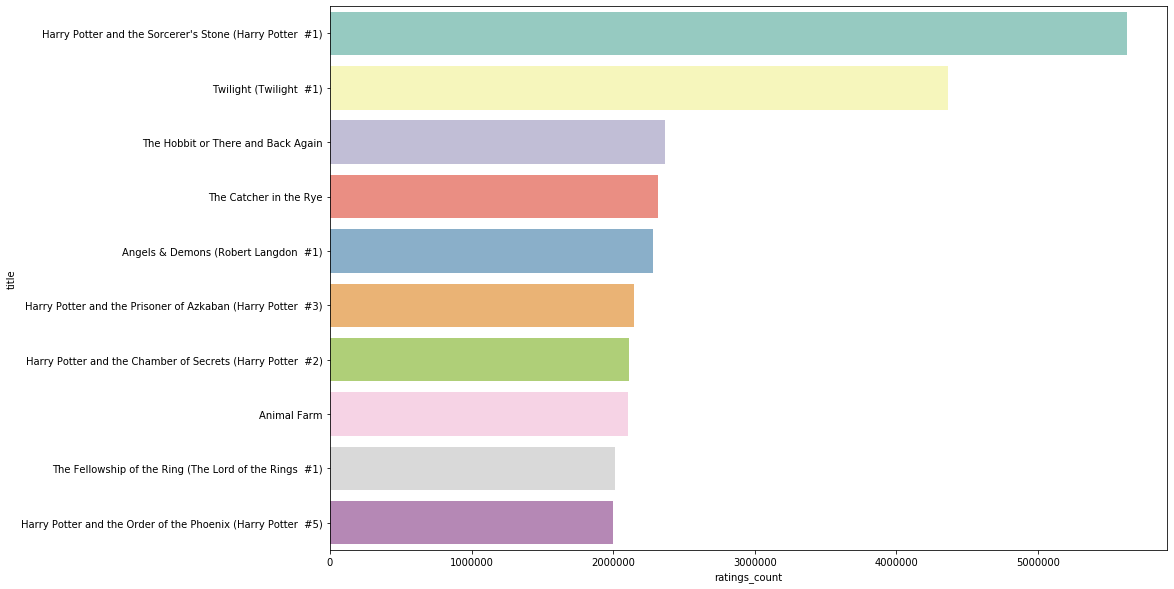

In [108]:
most_rated2 = data_df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='Set3')

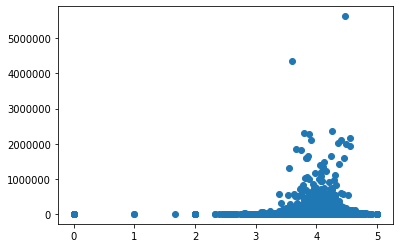

In [109]:
plt.scatter(data_df['average_rating'], data_df['ratings_count'])

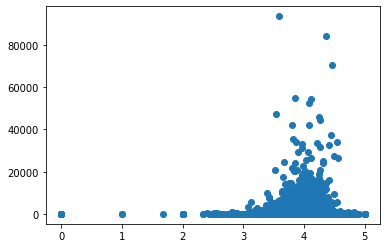

In [110]:
plt.scatter(data_df['average_rating'], data_df['text_reviews_count'])

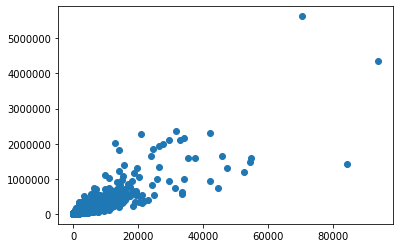

In [111]:
plt.scatter(data_df['text_reviews_count'], data_df['ratings_count'])

In [112]:
newdf = data_df[['average_rating','ratings_count']].copy()

In [113]:
newdf

,average_rating,ratings_count
0,4.56,1944099
1,4.49,1996446
2,4.47,5629932
3,4.41,6267
4,4.55,2149872
...,...,...
13709,3.82,11317
13710,3.72,8710
13711,3.53,14334
13712,4.43,1550


In [114]:
ratings = data_df['average_rating']

In [115]:
ratings

0        4.56
1        4.49
2        4.47
3        4.41
4        4.55
         ... 
13709    3.82
13710    3.72
13711    3.53
13712    4.43
13713    4.29
Name: average_rating, Length: 13714, dtype: float64

In [116]:
data_df.size

137140

In [117]:
newdf['rating_4_5'] = newdf.apply(lambda x: 1 if (x['average_rating'] >= 4 and x['average_rating'] <= 5) else 0, axis = 1)
newdf['rating_3_4'] = newdf.apply(lambda x: 1 if (x['average_rating'] >= 3 and x['average_rating'] < 4) else 0, axis = 1)
newdf['rating_2_3'] = newdf.apply(lambda x: 1 if (x['average_rating'] >= 2 and x['average_rating'] < 3) else 0, axis = 1)
newdf['rating_1_2'] = newdf.apply(lambda x: 1 if (x['average_rating'] >= 1 and x['average_rating'] < 2) else 0, axis = 1)
newdf['rating_0_1'] = newdf.apply(lambda x: 1 if (x['average_rating'] >= 0 and x['average_rating'] < 1) else 0, axis = 1)

In [118]:
newdf['rating_3_4'].value_counts()

1    7586
0    6128
Name: rating_3_4, dtype: int64

In [119]:
newdf['rating_2_3'].value_counts()

0    13642
1       72
Name: rating_2_3, dtype: int64

In [120]:
newdf['rating_1_2'].value_counts()

0    13711
1        3
Name: rating_1_2, dtype: int64

In [121]:
newdf['rating_0_1'].value_counts()

0    13680
1       34
Name: rating_0_1, dtype: int64

In [122]:
newdf

,average_rating,ratings_count,rating_4_5,rating_3_4,rating_2_3,rating_1_2,rating_0_1
0,4.56,1944099,1,0,0,0,0
1,4.49,1996446,1,0,0,0,0
2,4.47,5629932,1,0,0,0,0
3,4.41,6267,1,0,0,0,0
4,4.55,2149872,1,0,0,0,0
...,...,...,...,...,...,...,...
13709,3.82,11317,0,1,0,0,0
13710,3.72,8710,0,1,0,0,0
13711,3.53,14334,0,1,0,0,0
13712,4.43,1550,1,0,0,0,0


In [123]:
min_max_scaler = MinMaxScaler()
newdf = min_max_scaler.fit_transform(newdf)

In [124]:
np.round(newdf, 1)

array([[0.9, 0.3, 1. , ..., 0. , 0. , 0. ],
       [0.9, 0.4, 1. , ..., 0. , 0. , 0. ],
       [0.9, 1. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0.7, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.9, 0. , 1. , ..., 0. , 0. , 0. ],
       [0.9, 0. , 1. , ..., 0. , 0. , 0. ]])

In [125]:
from sklearn import neighbors
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(newdf)
distance, index = model.kneighbors(newdf)

In [133]:
def print_similar_books(id):
        print("title of the book is : ")
        print(data_df.iloc[id]["title"])
        print("\nmy recommendations are:")
        for new_id in index[id][1:]:
            print(data_df.iloc[new_id]["title"])

In [148]:
print_similar_books(121) #where id is the number of book in dataset

title of the book is : 
Miami Blues (Hoke Mosely #1)

my recommendations are:
Why Orwell Matters
Spring Torrents
The Five Bells and Bladebone (Richard Jury  #9)
A Midsummer Night's Dream
Balkan Ghosts: A Journey Through History
